<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 14** - Oct 24, 2016

- Classification trees
- Cross-validation
- Random forests

<hr/>

<h1><font color="darkblue">Decision Tree Learning</font></h1>

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 

> $\theta = $ (feature $j$, threshold $t$) 

> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*

> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini with $K$ classes in the partition $D$

>$\displaystyle H(D) = \sum_{i=1}^K p_i (1-p_i)$

> or variance for regression

- A binary tree!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


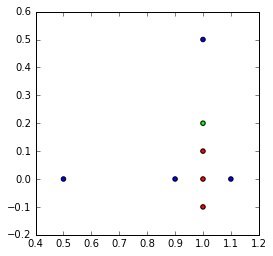

In [2]:
X = np.array([[.5,0],[1,.5],[1.1,0],[.9,0],[1,0],[1,-.1],[1,.1],[1,.2]],
             dtype=np.float)
c = np.array([ 0,0,0,0, 1,1,1, 2], dtype=np.float)
subplot(111,aspect='equal'); scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

### Gini impurity of a partition

- We have 3 classes total hence the sum for the entire dataset is

>$ \displaystyle H = \frac{4}{8}\left(1\!-\!\frac{4}{8}\right) 
     + \frac{3}{8}\left(1\!-\!\frac{3}{8}\right) 
     + \frac{1}{8}\left(1\!-\!\frac{1}{8}\right) $ $ \displaystyle = \frac{16}{64}
     + \frac{15}{64}
     + \frac{7}{64}
     = \frac{19}{32} = 0.59375$
     
- This is the root of the tree

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X,c)

print clf.tree_.n_node_samples
print clf.tree_.impurity
print clf.tree_.feature
print clf.tree_.threshold

[8 2 6]
[ 0.59375     0.          0.61111111]
[ 0 -2 -2]
[ 0.94999999 -2.         -2.        ]


### Impurity of 2 partitions after first split

- The root partition contains 3 classes hence the sum is

>$ \displaystyle H_{\rm{}left} = \frac{2}{2}\left(1\!-\!\frac{2}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right)= 0$

>$ \displaystyle H_{\rm{}right} = \frac{3}{6}\left(1\!-\!\frac{3}{6}\right) 
     + \frac{2}{6}\left(1\!-\!\frac{2}{6}\right) 
     + \frac{1}{6}\left(1\!-\!\frac{1}{6}\right) $ 
 $ \displaystyle = \frac{9}{36}
     + \frac{8}{36}
     + \frac{5}{36}
     = \frac{11}{18} $ $\approx 0.61111111$

> Cf. numbers above

- Note importance of weighting by partition sizes!

In [8]:
from sklearn import datasets

iris = datasets.load_iris()#load iris
X = iris.data[:,:2] # only first 2 features,0&1
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

print 'New classes:', np.unique(c)
print 'New data:', X.shape

New classes: [0 1]
New data: (100L, 2L)


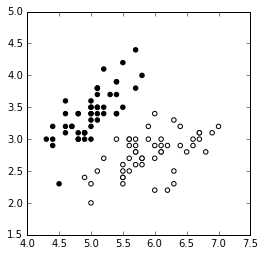

In [9]:
subplot(111,aspect='equal'); # aspect可以画出长宽相等的图
scatter(X[:,0],X[:,1],c=c,cmap=cm.gray);#c&cmap可以将不同类别用颜色表示

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)#clf是classifier
clf.fit(X,c)
print clf.tree_.n_node_samples
print clf.tree_.impurity
print clf.tree_.feature
print clf.tree_.threshold

[100  51  49]
[ 0.5         0.20761246  0.18325698]
[ 0 -2 -2]
[ 5.44999981 -2.         -2.        ]


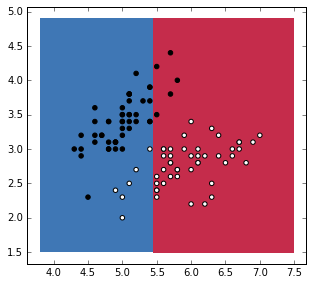

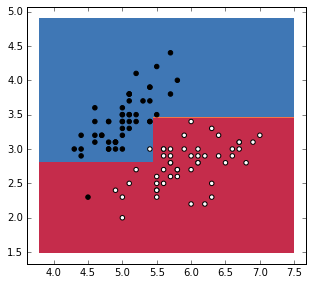

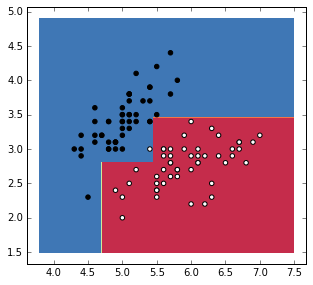

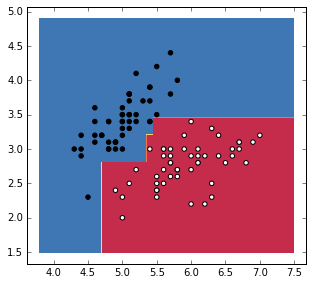

In [12]:
# grid of points within the limits
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X,c)
    z = clf.predict(c_[x.ravel(),y.ravel()]).reshape(x.shape)
    figure(figsize=(5,5)); subplot(111,aspect='equal')
    contourf(x, y, z, cmap=cm.Spectral_r)  # 等高线
    scatter(X[:,0], X[:,1], c=c, cmap=cm.gray); #颜色指示不同类别

In [13]:
# k-fold cross-validation 
from sklearn import cross_validation as cv
clf = tree.DecisionTreeClassifier(max_depth=1)
cv.cross_val_score(clf, X,c, cv=10)   

array([ 1. ,  0.8,  0.8,  0.8,  1. ,  1. ,  0.8,  0.9,  0.9,  0.9])

In [14]:
# also by hand
k_fold = cv.KFold(c.size, 10, shuffle=True, random_state=42) 
for k, (train, test) in enumerate(k_fold):
    cpred = clf.fit(X[train],c[train]).predict(X[test])
    print k, ':\t', (c[test]==cpred).sum() / float(test.size),
    print '\t=', clf.score(X[test],c[test])

0 :	1.0 	= 1.0
1 :	0.8 	= 0.8
2 :	0.9 	= 0.9
3 :	0.9 	= 0.9
4 :	1.0 	= 1.0
5 :	0.9 	= 0.9
6 :	1.0 	= 1.0
7 :	0.7 	= 0.7
8 :	0.9 	= 0.9
9 :	0.8 	= 0.8


<h1><font color="darkblue">Random Forest</font></h1>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build

### Forest of Random Trees

- Create multiple randomized trees to classify

> Combine the results, e.g., voting

- Check out Boostrap and Bagging

### Exercise #2

- Repeat exercise #1 using the random forest classifer

array([ 1. ,  0.9,  1. ,  1. ,  1. ,  1. ,  0.9,  1. ,  0.9,  1. ])

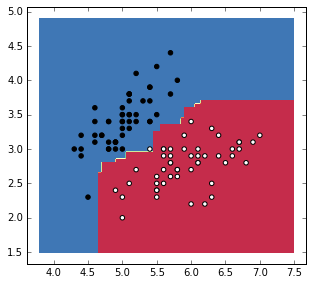

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=2)
clf.fit(X,c)
z = clf.predict(c_[x.ravel(),y.ravel()]).reshape(x.shape)
figure(figsize=(5,5)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);
cv.cross_val_score(clf, X,c, cv=10)

### Assumptions and Limitations

- Axis parallel boundaries might be suboptimal

- But there is no need for a distance function

- And improved by random forest with many trees

also

- Improvements in the estimation error by random forest
cf. central limit theorem



### Divide and Conquer

- These methods are applicable to regresion problems

> Minimize the variance of the left and right partitions

> e.g. piecewise constant

- Useful concepts to consider to build complex methods





### Logistic Regression

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png" width=300 align=right \>

- Classsifying into 2 classes: fit the probability

> Sigmoid or logistic function

>$\displaystyle \sigma(t) = \frac{1}{1+e^{-t}}$

> Cf. Posterior as fn of the log Bayes factor




0. Plug in say a linear model $t=\beta^T x$, as we did for linear regression
0. Transform the labels into frequencies and fit the probability

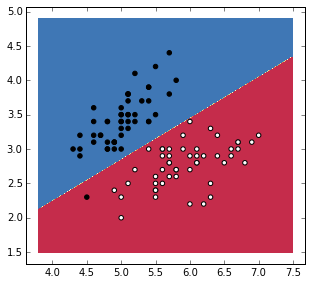

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,c)
z = clf.predict(c_[x.ravel(),y.ravel()]).reshape(x.shape)
figure(figsize=(5,5)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

### Support Vector Machines


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png" align=right width=300 \>


- Pick the best hyperplane to separate classes, cf. LDA
- Generalization to sets of hyperplanes
- Also kernel variants - more on this later




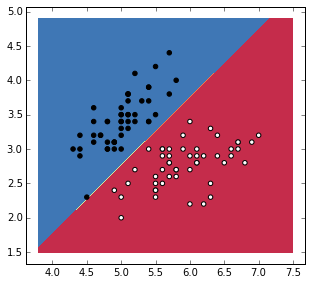

In [29]:
#除了用的扩展包不同，其余都是套路
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X,c)
z = clf.predict(c_[x.ravel(),y.ravel()]).reshape(x.shape)
figure(figsize=(5,5)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

### Comparison of Classifiers

 - Check out the 
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">demo script</a> running a bunch of classifiers in sklearn 